In [1]:
pip install sentinelhub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.6/245.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.6 MB/s eta 0:00:00
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6084 sha256=781f943c95f174df984f473a9a5d58821d33b11108790afecea4fa43adbe712f
  Stored in directory: /root/.cache/pip/wheels/2f/a1/c8/543df0e8f5e824c3e92a432e32deb9cd89ae686095ee8cfcbe
Successfully built utm


In [2]:
# from sentinelhub import SHConfig, MimeType, CRS, BBox, SentinelHubRequest, DataCollection, bbox_to_dimensions

# # Configure your Sentinel Hub credentials
# config = SHConfig()
# config.sh_client_id = '2c617fe0-8b57-46b5-ab1c-78c3241333da'
# config.sh_client_secret = 'i0b3aluYVuWRltQQMHgJEfDRuPhItfVH'
# config.instance_id = 'sentinalhub'  # This might be optional depending on your account setup
# config.save()

# # Decimal coordinates for center point
# center_longitude = -121.8782
# center_latitude = 37.3397

# # Define a small buffer around the center point
# buffer = 0.1  # Approximately 1 km buffer

# # Define the bounding box using min and max coordinates with the buffer
# min_longitude = center_longitude - buffer
# max_longitude = center_longitude + buffer
# min_latitude = center_latitude - buffer
# max_latitude = center_latitude + buffer

# # Create BBox object in WGS84
# bounding_box = BBox(bbox=(min_longitude, min_latitude, max_longitude, max_latitude), crs=CRS.WGS84)

# # Print bounding box to check
# print(bounding_box)

# bounding_box = BBox(bbox=bounding_box, crs=CRS.WGS84)

# # Specify the size of the image
# resolution = 60  # Resolution can be changed according to the need
# bbox_size = bbox_to_dimensions(bounding_box, resolution)

# # Define the evalscript to pull CH4 data with visualizations
# evalscript = """
# //VERSION=3
# var minVal = 1600.0;
# var maxVal = 2000.0;
# var diff = maxVal - minVal;
# const map = [
#     [minVal, 0x00007f],
#     [minVal + 0.125 * diff, 0x0000ff],
#     [minVal + 0.375 * diff, 0x00ffff],
#     [minVal + 0.625 * diff, 0xffff00],
#     [minVal + 0.875 * diff, 0xff0000],
#     [maxVal, 0x7f0000]
# ];

# const visualizer = new ColorRampVisualizer(map);

# function setup() {
#     return {
#         input: ["CH4", "dataMask"],
#         output: [
#             { id: "default", bands: 4 },
#             { id: "eobrowserStats", bands: 1 },
#             { id: "dataMask", bands: 1 },
#         ],
#     };
# }

# function evaluatePixel(samples) {
#     const CH4 = samples.CH4;
#     const [r, g, b] = visualizer.process(CH4);
#     const statsVal = isFinite(CH4) ? CH4 : NaN;
#     return {
#         default: [r, g, b, samples.dataMask],
#         eobrowserStats: [statsVal],
#         dataMask: [samples.dataMask],
#     };
# }
# """

# # Create a Sentinel Hub request
# request = SentinelHubRequest(
#     evalscript=evalscript,
#     input_data=[
#         SentinelHubRequest.input_data(
#             data_collection=DataCollection.SENTINEL5P,
#             time_interval=('2020-06-01', '2020-06-30'),  # Specify the time interval
#         )
#     ],
#     responses=[
#         SentinelHubRequest.output_response('default', MimeType.TIFF),
#         SentinelHubRequest.output_response('eobrowserStats', MimeType.TIFF),
#         SentinelHubRequest.output_response('dataMask', MimeType.TIFF)
#     ],
#     bbox=bounding_box,
#     size=bbox_size,
#     config=config
# )

# # Fetch data
# data = request.get_data()

# import tifffile as tiff



# # Check if any data was returned
# if data and len(data) > 0 and len(data[0]) > 0:
#     # Assuming the structure is as expected, save the images
#     if 'default' in data[0]:
#         tiff.imwrite('CH4_data.tif', data[0]['default'])  # Save the default visualization
#     if 'eobrowserStats' in data[0]:
#         tiff.imwrite('CH4_stats.tif', data[0]['eobrowserStats'])  # Save the statistical data
#     if 'dataMask' in data[0]:
#         tiff.imwrite('data_mask.tif', data[0]['dataMask'])  # Save the data mask
# else:
#     print("No valid data received. Check your request parameters and Sentinel Hub configuration.")



In [3]:
# from sentinelhub import SHConfig, MimeType, CRS, BBox, SentinelHubRequest, DataCollection, bbox_to_dimensions
# import tifffile as tiff

# # Configure your Sentinel Hub credentials securely
# config = SHConfig()
# config.sh_client_id = '2c617fe0-8b57-46b5-ab1c-78c3241333da'
# config.sh_client_secret = 'i0b3aluYVuWRltQQMHgJEfDRuPhItfVH'
# config.save()

# # Define the geographical area using decimal coordinates for center point
# center_longitude = -119.364
# center_latitude = 35.846

# # Define a buffer around the center point, approximately 0.1 degrees (~11 km)
# buffer = 0.5

# # Create BBox object in WGS84
# bounding_box = BBox(bbox=(center_longitude - buffer, center_latitude - buffer,
#                           center_longitude + buffer, center_latitude + buffer), crs=CRS.WGS84)

# # Specify the size of the image, resolution can be adjusted as needed
# bbox_size = bbox_to_dimensions(bounding_box, resolution=50)

# # Define the evalscript for visualizing CH4 data with a color ramp
# evalscript = """
# //VERSION=3

# // Define minimum and maximum CH4 values and compute the difference
# var minVal = 1600.0;
# var maxVal = 2000.0;
# var diff = maxVal - minVal;

# // Define a color map for visualizing CH4 concentrations
# const map = [
#     [minVal, 0x00007f],        // Dark blue at minimum value
#     [minVal + 0.125 * diff, 0x0000ff],  // Blue
#     [minVal + 0.375 * diff, 0x00ffff],  // Cyan
#     [minVal + 0.625 * diff, 0xffff00],  // Yellow
#     [minVal + 0.875 * diff, 0xff0000],  // Red
#     [maxVal, 0x7f0000]         // Dark red at maximum value
# ];

# // Initialize the visualizer with the color map
# const visualizer = new ColorRampVisualizer(map);

# function setup() {
#     // Define the inputs and outputs for the processing of the image
#     return {
#         input: ["CH4", "dataMask"],
#         output: [
#             { id: "default", bands: 4 },        // RGB + Alpha for visualization
#             { id: "eobrowserStats", bands: 1 }, // Single band for CH4 statistics
#             { id: "dataMask", bands: 1 }        // Data mask band
#         ]
#     };
# }

# function evaluatePixel(samples) {
#     // Process CH4 data to get RGB values based on predefined color ramp
#     const [r, g, b] = visualizer.process(samples.CH4);
#     const statsVal = isFinite(samples.CH4) ? samples.CH4 : NaN; // Check if CH4 data is finite for stats

#     // Return the processed data in the specified output bands
#     return {
#         default: [r, g, b, samples.dataMask],  // Color visualization with data mask as alpha
#         eobrowserStats: [statsVal],            // Statistical data of CH4
#         dataMask: [samples.dataMask]           // Pass-through of data mask
#     };
# }

# """

# # Create a Sentinel Hub request
# request = SentinelHubRequest(
#     evalscript=evalscript,
#     input_data=[SentinelHubRequest.input_data(data_collection=DataCollection.SENTINEL5P,
#                                               time_interval=('2020-06-01', '2021-06-30'))],
#     responses=[SentinelHubRequest.output_response('default', MimeType.TIFF)],
#     bbox=bounding_box,
#     size=bbox_size,
#     config=config
# )

# # Fetch data
# data = request.get_data()

# # Check if any data was returned and save the image if available
# if data:
#     tiff.imwrite('CH4_data.tif', data[0])
# else:
#     print("No valid data received. Check your request parameters and Sentinel Hub configuration.")


In [4]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 5.4 MB/s eta 0:00:00


In [5]:
# import rasterio
# from rasterio.transform import from_bounds
# from sentinelhub import SHConfig, MimeType, CRS, BBox, SentinelHubRequest, DataCollection, bbox_to_dimensions

# # Configure your Sentinel Hub credentials securely
# config = SHConfig()
# config.sh_client_id = '2c617fe0-8b57-46b5-ab1c-78c3241333da'
# config.sh_client_secret = 'i0b3aluYVuWRltQQMHgJEfDRuPhItfVH'
# config.save()

# # Define the geographical area using decimal coordinates for center point
# center_longitude = -119.364
# center_latitude = 35.846

# # Define a buffer around the center point, approximately 0.5 degrees
# buffer = 0.5

# # Create BBox object in WGS84
# bounding_box = BBox(bbox=(center_longitude - buffer, center_latitude - buffer,
#                           center_longitude + buffer, center_latitude + buffer), crs=CRS.WGS84)

# # Specify the size of the image, resolution can be adjusted as needed
# bbox_size = bbox_to_dimensions(bounding_box, resolution=50)

# # Define the evalscript
# evalscript = """
# //VERSION=3

# // Define minimum and maximum CH4 values and compute the difference
# var minVal = 1600.0;
# var maxVal = 2000.0;
# var diff = maxVal - minVal;

# // Define a color map for visualizing CH4 concentrations
# const map = [
#     [minVal, 0x00007f],        // Dark blue at minimum value
#     [minVal + 0.125 * diff, 0x0000ff],  // Blue
#     [minVal + 0.375 * diff, 0x00ffff],  // Cyan
#     [minVal + 0.625 * diff, 0xffff00],  // Yellow
#     [minVal + 0.875 * diff, 0xff0000],  // Red
#     [maxVal, 0x7f0000]         // Dark red at maximum value
# ];

# // Initialize the visualizer with the color map
# const visualizer = new ColorRampVisualizer(map);

# function setup() {
#     // Define the inputs and outputs for the processing of the image
#     return {
#         input: ["CH4", "dataMask"],
#         output: [
#             { id: "default", bands: 4 },        // RGB + Alpha for visualization
#             { id: "eobrowserStats", bands: 1 }, // Single band for CH4 statistics
#             { id: "dataMask", bands: 1 }        // Data mask band
#         ]
#     };
# }

# function evaluatePixel(samples) {
#     // Process CH4 data to get RGB values based on predefined color ramp
#     const [r, g, b] = visualizer.process(samples.CH4);
#     const statsVal = isFinite(samples.CH4) ? samples.CH4 : NaN; // Check if CH4 data is finite for stats

#     // Return the processed data in the specified output bands
#     return {
#         default: [r, g, b, samples.dataMask],  // Color visualization with data mask as alpha
#         eobrowserStats: [statsVal],            // Statistical data of CH4
#         dataMask: [samples.dataMask]           // Pass-through of data mask
#     };
# }
# """

# # Create a Sentinel Hub request
# request = SentinelHubRequest(
#     evalscript=evalscript,
#     input_data=[SentinelHubRequest.input_data(data_collection=DataCollection.SENTINEL5P,
#                                               time_interval=('2020-06-01', '2021-06-30'))],
#     responses=[SentinelHubRequest.output_response('default', MimeType.TIFF)],
#     bbox=bounding_box,
#     size=bbox_size,
#     config=config
# )

# # Fetch data
# data = request.get_data()

# # Check if any data was returned and save the image if available
# if data:
#     # Using rasterio to save the TIFF with geospatial metadata
#     transform = from_bounds(west=bounding_box.min_x, south=bounding_box.min_y,
#                             east=bounding_box.max_x, north=bounding_box.max_y,
#                             width=bbox_size[0], height=bbox_size[1])
#     with rasterio.open(
#         'CH4_data1.tif', 'w', driver='GTiff',
#         height=bbox_size[1], width=bbox_size[0],
#         count=3, dtype=data[0].dtype, crs='EPSG:4326',
#         transform=transform) as dst:
#         for i in range(3):
#             dst.write(data[0][i], i + 1)
# else:
#     print("No valid data received. Check your request parameters and Sentinel Hub configuration.")


In [6]:
# import rasterio
# from rasterio.transform import from_bounds
# import numpy as np
# import matplotlib.pyplot as plt
# from sentinelhub import SHConfig, MimeType, CRS, BBox, SentinelHubRequest, DataCollection, bbox_to_dimensions

# # Configuration and Authentication
# config = SHConfig()
# config.sh_client_id = '2c617fe0-8b57-46b5-ab1c-78c3241333da'
# config.sh_client_secret = 'i0b3aluYVuWRltQQMHgJEfDRuPhItfVH'
# config.save()

# # Geographical and Request Parameters
# center_longitude = -121.2973
# center_latitude = 45.9993
# buffer = 0.01
# bounding_box = BBox(bbox=(center_longitude - buffer, center_latitude - buffer,
#                           center_longitude + buffer, center_latitude + buffer), crs=CRS.WGS84)
# bbox_size = bbox_to_dimensions(bounding_box, resolution=50)

# # Evalscript to Fetch CH4 Data
# evalscript = """
# //VERSION=3
# function setup() {
#     return {
#         input: ["CH4"],
#         output: { bands: 1, sampleType: "FLOAT32" }
#     };
# }
# function evaluatePixel(sample) {
#     return [sample.CH4];
# }
# """

# # Creating and Sending Request
# request = SentinelHubRequest(
#     evalscript=evalscript,
#     input_data=[SentinelHubRequest.input_data(data_collection=DataCollection.SENTINEL5P,
#                                               time_interval=('2020-06-01', '2021-06-30'))],
#     responses=[SentinelHubRequest.output_response('default', MimeType.TIFF)],
#     bbox=bounding_box,
#     size=bbox_size,
#     config=config
# )

# # Fetch Data
# data = request.get_data()

# # Processing and Saving the Image
# if data:
#     # Color Mapping
#     minVal, maxVal = 1600.0, 2000.0
#     norm = plt.Normalize(vmin=minVal, vmax=maxVal)
#     cmap = plt.get_cmap('hot')
#     colored_data = cmap(norm(data[0]))

#     # Saving the Image with Geospatial Metadata
#     transform = from_bounds(bounding_box.min_x, bounding_box.min_y, bounding_box.max_x, bounding_box.max_y,
#                             width=bbox_size[0], height=bbox_size[1])
#     with rasterio.open(
#         'CH4_colored.tif', 'w', driver='GTiff',
#         height=bbox_size[1], width=bbox_size[0],
#         count=3, dtype='uint8', crs='EPSG:4326',
#         transform=transform) as dst:
#         for i in range(3):  # RGB channels
#             dst.write((colored_data[:, :, i] * 255).astype('uint8'), i+1)
# else:
#     print("No valid data received. Check your request parameters and Sentinel Hub configuration.")


In [7]:
# import rasterio
# from rasterio.transform import from_bounds
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# from sentinelhub import SHConfig, MimeType, CRS, BBox, SentinelHubRequest, DataCollection, bbox_to_dimensions

# # Configuration and Authentication
# config = SHConfig()
# config.sh_client_id = '2c617fe0-8b57-46b5-ab1c-78c3241333da'
# config.sh_client_secret = 'i0b3aluYVuWRltQQMHgJEfDRuPhItfVH'
# config.save()

# # Geographical and Request Parameters
# center_longitude = -119.364
# center_latitude = 35.846
# buffer = 0.1
# bounding_box = BBox(bbox=(center_longitude - buffer, center_latitude - buffer,
#                           center_longitude + buffer, center_latitude + buffer), crs=CRS.WGS84)
# bbox_size = bbox_to_dimensions(bounding_box, resolution=50)

# # Evalscript to Fetch CH4 Data
# evalscript = """
# //VERSION=3
# function setup() {
#     return {
#         input: ["CH4"],
#         output: { bands: 1, sampleType: "FLOAT32" }
#     };
# }
# function evaluatePixel(sample) {
#     return [sample.CH4];
# }
# """

# # Creating and Sending Request
# request = SentinelHubRequest(
#     evalscript=evalscript,
#     input_data=[SentinelHubRequest.input_data(data_collection=DataCollection.SENTINEL5P,
#                                               time_interval=('2020-06-01', '2021-06-30'))],
#     responses=[SentinelHubRequest.output_response('default', MimeType.TIFF)],
#     bbox=bounding_box,
#     size=bbox_size,
#     config=config
# )

# data = request.get_data()

# # Processing and Saving the Image
# if data:
#     data = data[0]  # Assuming data is the first index
#     data = np.nan_to_num(data)  # Replace NaNs with zero

#     # Create a custom color map with transparency for nodata
#     colors = ["navy", "blue", "cyan", "yellow", "red", "darkred"]
#     cmap = mcolors.LinearSegmentedColormap.from_list("custom_ch4", colors)
#     cmap.set_under('black')  # Set color for underflow (data < minVal)
#     cmap.set_over('black')  # Set color for overflow (data > maxVal)
#     cmap.set_bad((0, 0, 0, 0))  # Set transparency for invalid data

#     # Normalize and apply color map
#     minVal, maxVal = 1600.0, 2000.0
#     norm = mcolors.Normalize(vmin=minVal, vmax=maxVal)
#     colored_data = cmap(norm(data))

#     # Define transform and metadata for saving
#     transform = from_bounds(bounding_box.min_x, bounding_box.min_y, bounding_box.max_x, bounding_box.max_y,
#                             width=bbox_size[0], height=bbox_size[1])

#     # Save the image with geospatial metadata
#     with rasterio.open(
#         'CH4_colored.tif', 'w', driver='GTiff',
#         height=bbox_size[1], width=bbox_size[0],
#         count=4, dtype='uint8', crs='EPSG:4326',
#         transform=transform) as dst:
#         for i in range(3):  # RGB channels
#             dst.write((colored_data[:, :, i] * 255).astype(rasterio.uint8), i + 1)
#         dst.write((colored_data[:, :, 3] * 255).astype(rasterio.uint8), 4)  # Alpha channel
# else:
#     print("No valid data received. Check your request parameters and Sentinel Hub configuration.")


In [8]:
import rasterio
from rasterio.transform import from_bounds
import numpy as np
import matplotlib.pyplot as plt
from sentinelhub import SHConfig, MimeType, CRS, BBox, SentinelHubRequest, DataCollection, bbox_to_dimensions

# Configuration and Authentication
config = SHConfig()
config.sh_client_id = '2c617fe0-8b57-46b5-ab1c-78c3241333da'
config.sh_client_secret = 'i0b3aluYVuWRltQQMHgJEfDRuPhItfVH'
config.save()

# Geographical and Request Parameters
center_longitude = -121.94856289
center_latitude = 37.43123851
buffer = 0.4
bounding_box = BBox(bbox=(center_longitude - buffer, center_latitude - buffer,
                          center_longitude + buffer, center_latitude + buffer), crs=CRS.WGS84)
bbox_size = bbox_to_dimensions(bounding_box, resolution=50)

# Evalscript to Fetch CH4 Data
evalscript = """
//VERSION=3
function setup() {
    return {
        input: ["CH4"],
        output: { bands: 1, sampleType: "FLOAT32" }
    };
}
function evaluatePixel(sample) {
    return [sample.CH4];
}
"""

# Creating and Sending Request
request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[SentinelHubRequest.input_data(data_collection=DataCollection.SENTINEL5P,
                                              time_interval=('2020-06-01', '2021-06-30'))],
    responses=[SentinelHubRequest.output_response('default', MimeType.TIFF)],
    bbox=bounding_box,
    size=bbox_size,
    config=config
)

# Fetch Data
data = request.get_data()

# Processing and Saving the Image
if data:
    # Color Mapping
    minVal, maxVal = 1600.0, 2000.0
    norm = plt.Normalize(vmin=minVal, vmax=maxVal)
    cmap = plt.get_cmap('jet')  # Using jet colormap for similar color scheme
    colored_data = cmap(norm(data[0]))

    # Saving the Image with Geospatial Metadata
    transform = from_bounds(bounding_box.min_x, bounding_box.min_y, bounding_box.max_x, bounding_box.max_y,
                            width=bbox_size[0], height=bbox_size[1])
    with rasterio.open(
        'CH4_colored.tif', 'w', driver='GTiff',
        height=bbox_size[1], width=bbox_size[0],
        count=3, dtype='uint8', crs='EPSG:4326',
        transform=transform) as dst:
        for i in range(3):  # RGB channels
            dst.write((colored_data[:, :, i] * 255).astype('uint8'), i+1)
else:
    print("No valid data received. Check your request parameters and Sentinel Hub configuration.")


In [9]:
# prompt: open tif files and display what are there in it

import tifffile as tiff
with tiff.TiffFile('/content/CH4_colored.tif') as tif:
    for page in tif.pages:
        print(page.tags)
        print(page.asarray())


TiffTag 256 ImageWidth @10 SHORT @18 = 1396
TiffTag 257 ImageLength @22 SHORT @30 = 1791
TiffTag 258 BitsPerSample @34 SHORT[3] @206 = (8, 8, 8)
TiffTag 259 Compression @46 SHORT @54 = NONE
TiffTag 262 PhotometricInterpretation @58 SHORT @66 = RGB
TiffTag 273 StripOffsets @70 LONG[1791] @3794 = (3328020, 3332208, 3336396, 334
TiffTag 277 SamplesPerPixel @82 SHORT @90 = 3
TiffTag 278 RowsPerStrip @94 SHORT @102 = 1
TiffTag 279 StripByteCounts @106 SHORT[1791] @212 = (4188, 4188, 4188, 4188, 41
TiffTag 284 PlanarConfiguration @118 SHORT @126 = CONTIG
TiffTag 339 SampleFormat @130 SHORT[3] @10958 = ('UINT', 'UINT', 'UINT')
TiffTag 33550 ModelPixelScaleTag @142 DOUBLE[3] @10964 = (0.0005730659025788047
TiffTag 33922 ModelTiepointTag @154 DOUBLE[6] @10988 = (0.0, 0.0, 0.0, -122.348
TiffTag 34735 GeoKeyDirectoryTag @166 SHORT[32] @11036 = (1, 1, 0, 7, 1024, 0,
TiffTag 34736 GeoDoubleParamsTag @178 DOUBLE[2] @11100 = (298.257223563, 637813
TiffTag 34737 GeoAsciiParamsTag @190 ASCII[8] @11116 

In [10]:
!pip install rasterio folium geopandas


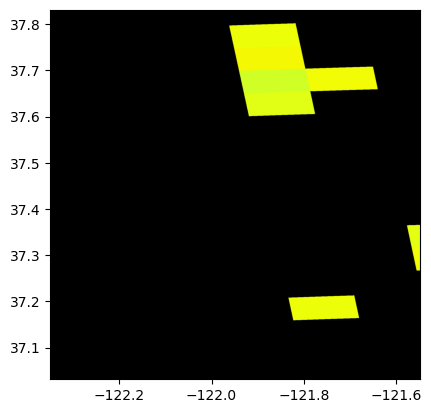

In [11]:
import rasterio
from rasterio.plot import show
from rasterio.transform import from_origin

# Path to the TIFF file
tiff_file = '/content/CH4_colored.tif'

# Open the TIFF file
with rasterio.open(tiff_file) as src:
    data = src.read()
    transform = from_origin(west=center_longitude - buffer, north=center_latitude + buffer,
                            xsize=src.res[0], ysize=src.res[1])

    # Show the image (Optional: to verify it's loaded correctly)
    show(src)


In [12]:
pip install ipyleaflet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.6 MB/s eta 0:00:00


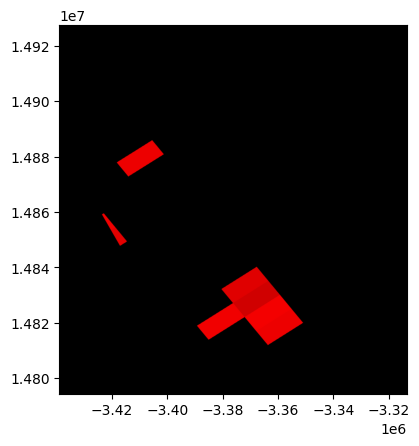

In [14]:
import rasterio
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, Resampling
from pyproj import CRS

# Define source and target coordinate reference systems
src_crs = CRS.from_epsg(4326)  # Assuming the original is in WGS84 lat/lon
target_crs = CRS.from_epsg(32633)  # Example UTM zone

# Path to the TIFF file
tiff_file = '/content/CH4_colored.tif'

# Open the TIFF file
with rasterio.open(tiff_file) as src:
    # Calculate the transform and dimensions for the target CRS
    transform, width, height = calculate_default_transform(
        src.crs, target_crs, src.width, src.height, *src.bounds)

    # Create destination array
    dest = np.zeros((src.count, height, width), dtype=rasterio.uint16)

    # Reproject the data
    reproject(
        source=rasterio.band(src, 1),
        destination=dest,
        src_transform=src.transform,
        src_crs=src.crs,
        dst_transform=transform,
        dst_crs=target_crs,
        resampling=Resampling.nearest)

    # Show the reprojected image
    show(dest, transform=transform)
